In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 16

In [6]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [0]:
path = Path('/drive/My Drive/ML DL Data/green-apple_pear_guava')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='Train', valid='Validate',
                                 ds_tfms=get_transforms(),
                                 size=224).normalize()

In [26]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['green_apple', 'guava', 'pear'], 3, 390, 88)

In [28]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 102920481.45it/s]


In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.198531,0.570621,0.204545,03:09
1,0.760579,0.313982,0.136364,02:42
2,0.542330,0.274298,0.090909,02:42
3,0.423580,0.263864,0.068182,02:42


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


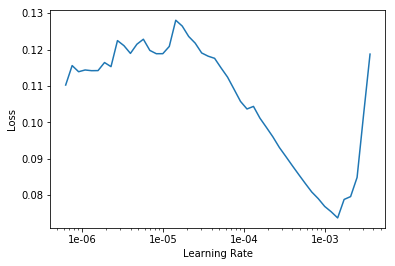

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(2, slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.087449,0.272793,0.113636,03:46
1,0.079470,0.250578,0.090909,03:46


In [0]:
learn.save('stage-2')

In [37]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (390 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Valid: LabelList (88 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=

In [0]:
learn.unfreeze()

In [39]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.118552,0.331771,0.090909,03:45
1,0.097997,0.433923,0.079545,03:45
2,0.080838,0.387400,0.079545,03:45
3,0.066837,0.362166,0.079545,03:45


In [0]:
learn.save('stage-3')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

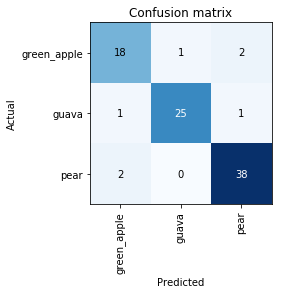

In [42]:
interp.plot_confusion_matrix()

In [43]:
interp.most_confused()

[('green_apple', 'pear', 2),
 ('pear', 'green_apple', 2),
 ('green_apple', 'guava', 1),
 ('guava', 'green_apple', 1),
 ('guava', 'pear', 1)]

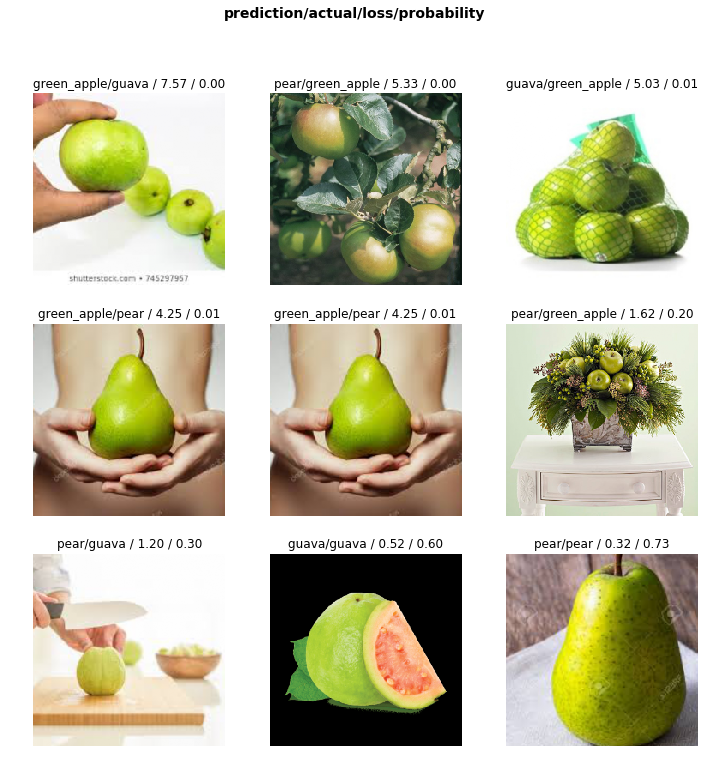

In [44]:
interp.plot_top_losses(9)

In [46]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (390 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Valid: LabelList (88 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

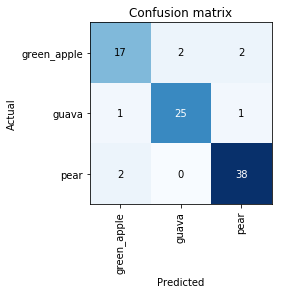

In [49]:
interp.plot_confusion_matrix()

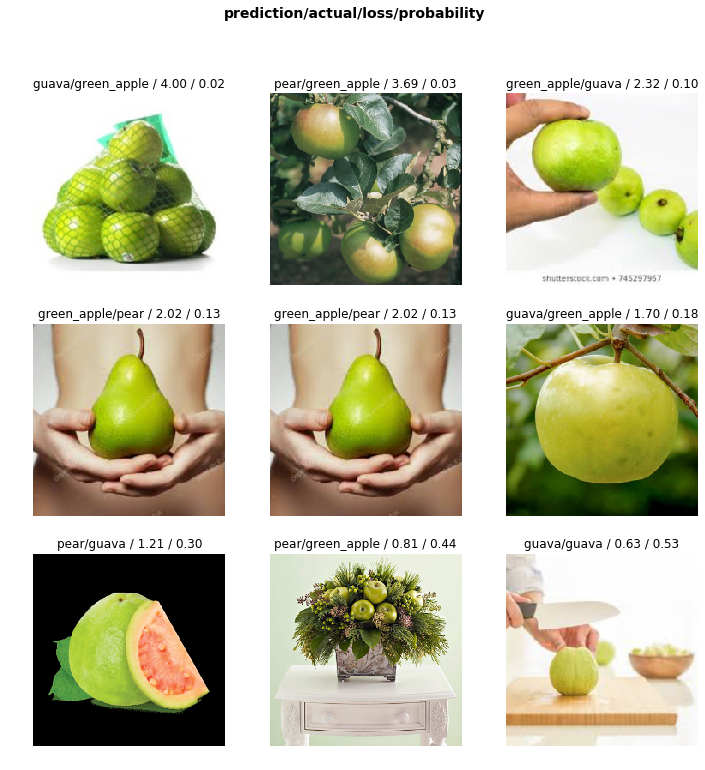

In [51]:
interp.plot_top_losses(9)

In [52]:
interp.most_confused()

[('green_apple', 'guava', 2),
 ('green_apple', 'pear', 2),
 ('pear', 'green_apple', 2),
 ('guava', 'green_apple', 1),
 ('guava', 'pear', 1)]

In [53]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (390 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Valid: LabelList (88 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
green_apple,green_apple,green_apple,green_apple,green_apple
Path: /drive/My Drive/ML DL Data/green-apple_pear_guava;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

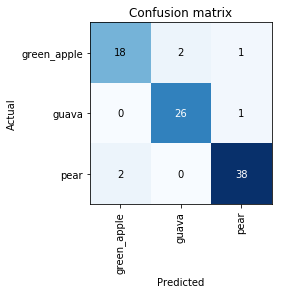

In [55]:
interp.plot_confusion_matrix()

In [57]:
interp.most_confused()

[('green_apple', 'guava', 2),
 ('pear', 'green_apple', 2),
 ('green_apple', 'pear', 1),
 ('guava', 'pear', 1)]

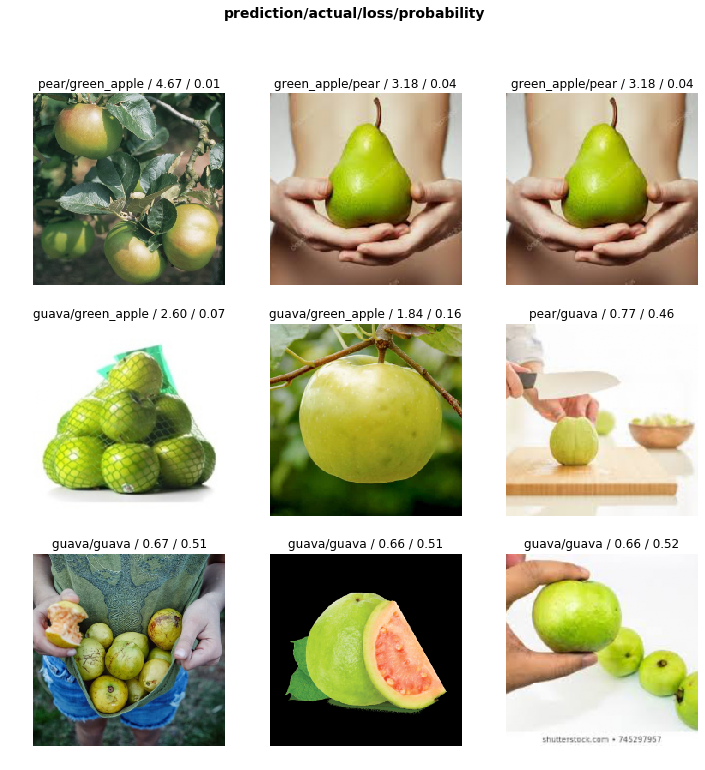

In [58]:
interp.plot_top_losses(9)

In [0]:
from fastai.metrics import *

In [0]:
learn.metrics=[error_rate,
               Precision(average='micro'),
               Recall(average='micro'),
               FBeta(average='micro')]

In [66]:
doc(learn.export)

In [0]:
!mkdir '/drive/My Drive/ML DL Data/saved_models'
save_path = Path('/drive/My Drive/ML DL Data/saved_models')

In [0]:
learn.export(file=save_path/'green_apple_2.pkl')

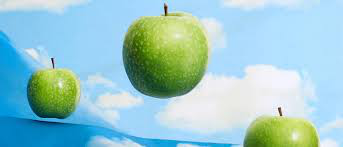

In [69]:
img = open_image('/GA.jpeg')
img

In [71]:
doc(load_learner)

In [0]:
model = load_learner(save_path, file='green_apple.pkl')

In [80]:
pred_class, pred_idx, outputs = model.predict(img)
pred_class

Category green_apple

In [81]:
pred_idx

tensor(0)

In [82]:
outputs

tensor([9.9422e-01, 5.5491e-03, 2.2818e-04])